In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [5]:
df = pd.read_csv("GOOGL.csv")
df = df[["Date","Close"]]
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Close
0,2022-06-22,111.487503
1,2022-06-23,112.241997
2,2022-06-24,117.974998
3,2022-06-27,115.833504
4,2022-06-28,112.007500


In [21]:
df.tail()

,Date,Close
246,2023-06-14,123.669998
247,2023-06-15,125.089996
248,2023-06-16,123.529999
249,2023-06-20,123.099998
250,2023-06-21,120.550003


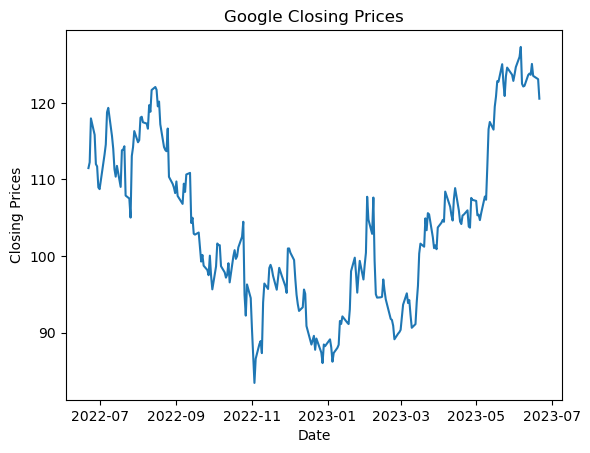

In [32]:
plt.plot(df.Date, df.Close);
plt.title("Google Closing Prices")
plt.xlabel('Date');
plt.ylabel('Closing Prices');

# Decomposition

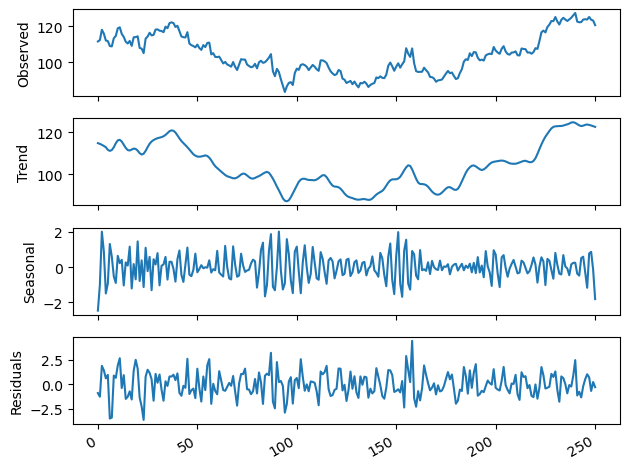

In [7]:
advanced_decomposition = STL(df.Close, period=4).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

fig.autofmt_xdate()
plt.tight_layout()

# ADF Test

In [8]:
adf_test = adfuller(df.Close)

# non-stationary
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -1.4904778097402294
p-value: 0.538216461195455


# ACF Plot

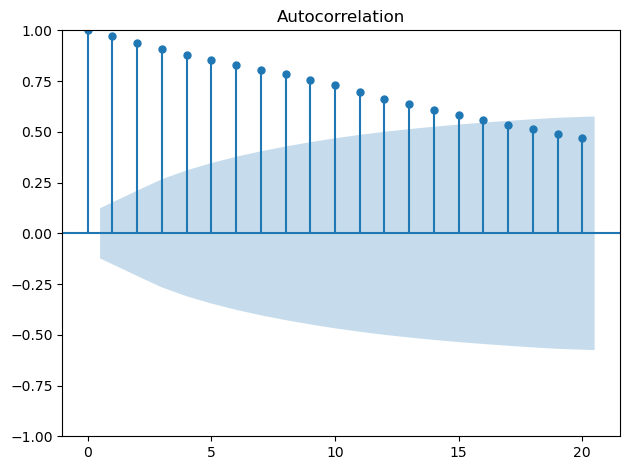

In [9]:
plot_acf(df.Close, lags=20);

plt.tight_layout()

# Data Trasnformation

In [10]:
df_diff = np.diff(df.Close, n=1)

# ADF Test After Transformation

In [11]:
adf_test = adfuller(df_diff)

# stationary
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -15.35612522283515
p-value: 3.664746148276414e-28


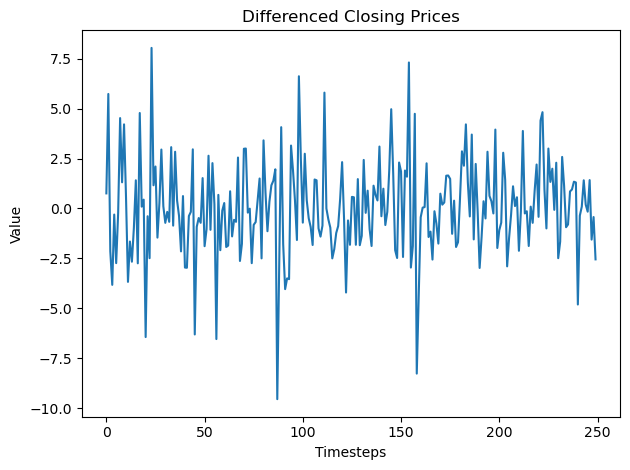

In [12]:
plt.plot(df_diff)
plt.title('Differenced Closing Prices')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

# ACF Plot After Transformation

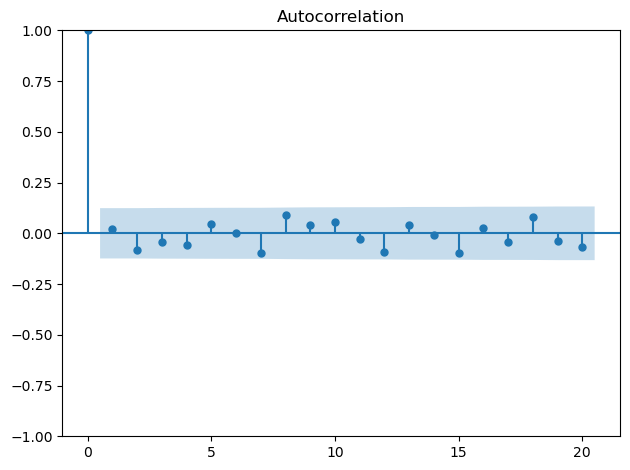

In [13]:
plot_acf(df_diff, lags=20);

plt.tight_layout()

# Baseline Model

In [26]:
df_ = pd.DataFrame({"Close":df_diff})
df_.shape

(250, 1)

In [27]:
train = df_[:246]
test = df_[246:]

In [29]:
# Forecast with mean

mean = np.mean(train.Close)

test.loc[:, "pred_mean"] = mean

# Forecast with last observed value

last_value = train.iloc[-1].Close
test.loc[:, "pred_last"] = last_value

/var/folders/fx/sfm1r3x51czb__n2j19fryw00000gn/T/ipykernel_13945/623083393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_mean"] = mean
/var/folders/fx/sfm1r3x51czb__n2j19fryw00000gn/T/ipykernel_13945/623083393.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last"] = last_value


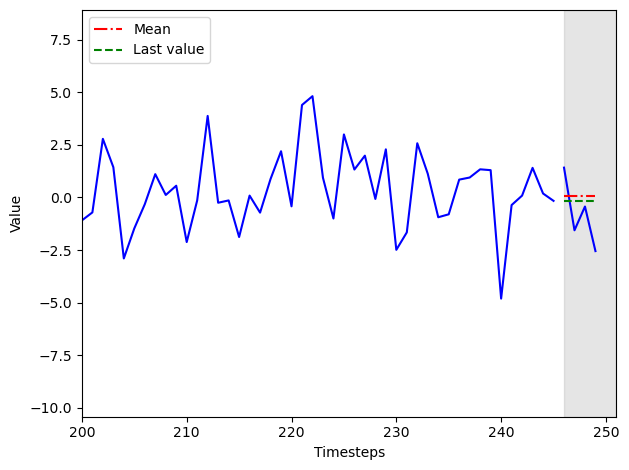

In [30]:
fig, ax = plt.subplots()

ax.plot(train.Close, 'b-')
ax.plot(test['Close'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')

ax.axvspan(246, 251, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.xlim(200, 251)

plt.tight_layout()

In [31]:
mse_mean = mean_squared_error(test['Close'], test['pred_mean'])
mse_last = mean_squared_error(test['Close'], test['pred_last'])

print(mse_mean, mse_last)

2.8640472644467554 2.5603355200357534
